<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/_002_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Supervised Learning**

###**Classification and Regression**
- There are two major types of supervised machine learning problems, called **classification and regression.**
- In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities
- Classification is sometimes separated into **binary classification**,
which is the special case of distinguishing between exactly two classes, and **multiclass
classification**, which is classification between more than two classes.

- For **regression tasks**, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms).
- (example) : Predicting a
person’s annual income from their education, their age, and where they live is an
example of a regression task,When predicting income, the predicted value is an
amount, and can be any number in a given range
- **An easy way to distinguish between classification and regression tasks is to ask
whether there is some kind of continuity in the output. If there is continuity between
possible outcomes, then the problem is a regression problem**


##**Some Sample Datasets**
- We will use several datasets to illustrate the different algorithms. Some of the datasets
will be small and synthetic (meaning made-up), designed to highlight particular
aspects of the algorithms. Other datasets will be large, real-world examples.
- **An example of a synthetic two-class classification dataset is the forge dataset, which
has two features**
- The following code creates a scatter plot visualizing all
of the data points in this dataset. The plot has the first feature on the x-axis and the
second feature on the y-axis. As is always the case in scatter plots, each data point is
represented as one dot. The color and shape of the dot indicates its class:

In [ ]:
!pip install mglearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import mglearn

X,y = mglearn.datasets.make_forge()

In [ ]:
import pandas as pd

# Convert the arrays to a pandas DataFrame
df = pd.DataFrame(X, columns=["First feature", "Second feature"])
df["Class"] = y

df.head()

,First feature,Second feature,Class
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0


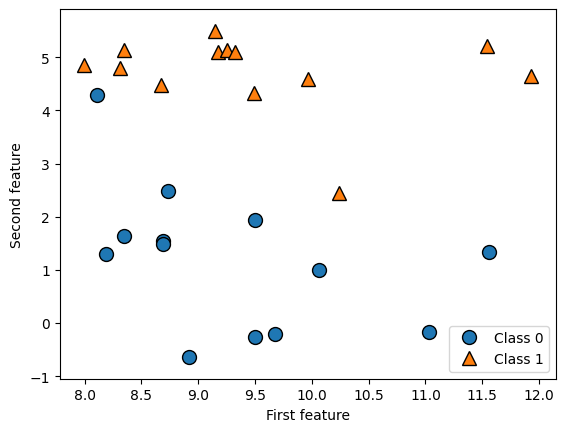

In [ ]:
# Create a scatter plot
# X[:, 0] -> First feature (x-coordinates)
# X[:, 1] -> Second feature (y-coordinates)
# y -> Class labels (used for coloring/marking points)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Add legend to the plot
plt.legend(["Class 0", "Class 1"], loc=4)

# Label the axes
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Show the plot
plt.show()

In [ ]:
print(X.shape) #  it typically has a shape of (n_samples, n_features)
print(y.shape)

(26, 2)
(26,)


In [ ]:
 # As you can see from X.shape, this dataset consists of 26 data points, with 2 features

To illustrate regression algorithms, we will use the synthetic **wave dataset.** The wave
dataset has a **single input feature and a continuous target variable (or response)** that
we want to model. The plot created here (Figure 2-3) shows the single feature on the
x-axis and the regression target (the output) on the y-axis:


In [ ]:
X,y = mglearn.datasets.make_wave(n_samples=40)

print(X.shape)
print(y.shape)

wave_df = pd.DataFrame(X,columns=["input"])
wave_df["output"] = y

wave_df.head(10)

(40, 1)
(40,)


,input,output
0,-0.752759,-0.448221
1,2.704286,0.331226
2,1.391964,0.779321
3,0.591951,0.034979
4,-2.063888,-1.387736
5,-2.064033,-2.471962
6,-2.651498,-1.527308
7,2.197057,1.494172
8,0.606690,1.000324
9,1.248435,0.229562


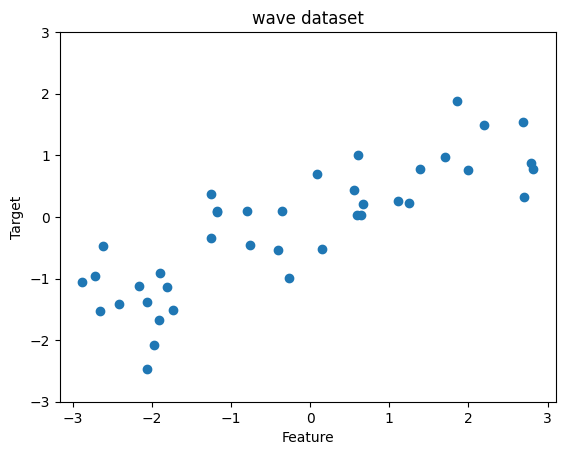

In [ ]:
plt.plot(X,y,"o")
plt.ylim(-3, 3)
plt.title('wave dataset')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

- We are using these very simple, low-dimensional datasets because we can easily visu‐
alize them—a printed page has two dimensions, so data with more than two features
is hard to show. Any intuition derived from datasets with few features (also called
low-dimensional datasets) might not hold in datasets with many features (highdimensional datasets). As long as you keep that in mind, inspecting algorithms on
low-dimensional datasets can be very instructive.
- **We will complement these small synthetic datasets with two real-world datasets that
are included in scikit-learn. One is the Wisconsin Breast Cancer dataset (cancer,
for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to predict whether a tumor is malignant based on the meas‐
urements of the tissue.**

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np

breast_cancer = load_breast_cancer()

print(f"breast_cancer.keys() --> {breast_cancer.keys()}")
print(f"shape of data --> {breast_cancer.data.shape}")
print("Sample counts per class --> {}".format(
    {n: v for n, v in zip(breast_cancer.target_names, np.bincount(breast_cancer.target))}))


breast_cancer.keys() --> dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
shape of data --> (569, 30)
Sample counts per class --> {'malignant': 212, 'benign': 357}


In [ ]:
breast_cancer_df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- We will also be using a real-world regression dataset, the Boston Housing dataset.
The task associated with this dataset is to predict the median value of homes in sev‐
eral Boston neighborhoods in the 1970s, using information such as crime rate, prox‐
imity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features:


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

print("Data shape: {}".format(boston_data.shape))

Data shape: (506, 13)


Again, you can get more information about the dataset by reading the DESCR attribute
of boston. For our purposes here, we will actually expand this dataset by not only
considering these 13 measurements as input features, but also looking at all products
(also called interactions) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate
and highway accessibility. Including derived feature like these is called feature engi‐
neering, which we will discuss in more detail in Chapter 4. This derived dataset can be
loaded using the load_extended_boston function:

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))
'''
The resulting 104 features are the 13 original features together with the 91 possible
combinations of two features within those 13
'''
print()

X.shape: (506, 104)



##**k-Nearest Neighbors**
- The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”
###**k-Neighbors classification**
- In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐
bor, which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point. Figure 2-4
illustrates this for the case of classification on the forge dataset

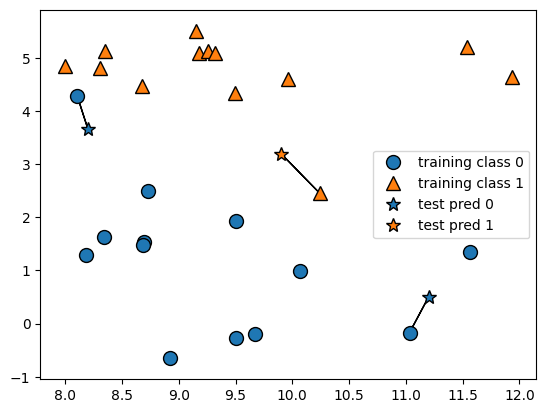

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


- Here, we added three new data points, shown as stars. For each of them, we marked
the closest point in the training set. The prediction of the one-nearest-neighbor algo‐
rithm is the label of that point (shown by the color of the cross).
- Instead of considering only the closest neighbor, we can also consider an arbitrary
number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm
comes from. When considering more than one neighbor, we use voting to assign a
label. This means that for each test point, we count how many neighbors belong to
class 0 and how many neighbors belong to class 1. We then assign the class that is
more frequent: in other words, the majority class among the k-nearest neighbors. The
following example (Figure 2-5) uses the three closest neighbors:

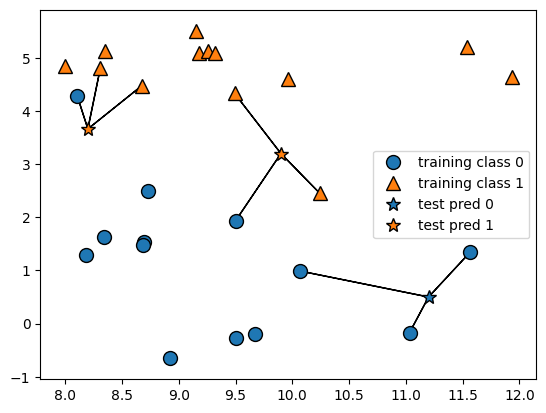

In [ ]:
# Predictions made by the three-nearest-neighbors model on the forge dataset
mglearn.plots.plot_knn_classification(n_neighbors=3)

- Again, the prediction is shown as the color of the cross. You can see that the predic‐
tion for the new data point at the top left is not the same as the prediction when we
used only one neighbor.
- While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class.
- Now let’s look at how we can apply the k-nearest neighbors algorithm using scikitlearn. First, we split our data into a training and a test set so we can evaluate general‐
ization performance, as discussed in Chapter 1:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

The make_forge dataset is a synthetic dataset provided by the mglearn library, commonly used for educational purposes and demonstration of machine learning algorithms. This dataset is designed to be simple and small, making it easy to visualize and understand.

- **Purpose:** The make_forge dataset is used to illustrate the behavior of classification algorithms. It contains two features, which allows it to be easily plotted in a 2D scatter plot.

- **Structure:** The dataset consists of two features and a binary target variable (class labels). The features can be visualized on a 2D plane, making it straightforward to observe how different classifiers separate the classes.

- **Example Usage:** The dataset is often used in introductory machine learning courses and books to demonstrate basic concepts such as decision boundaries, overfitting, and the performance of different classifiers.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

print(X_train.shape)
print(X_test.shape)

(19, 2)
(7, 2)


In [ ]:
X_test_pred = clf.predict(X_test)
print(f"Test set predictions: {X_test_pred}")

Test set predictions: [1 0 1 0 1 0 0]


The **score()** method in scikit-learn is used to evaluate the performance of a model. For classification tasks, it returns the mean accuracy on the given test data and labels.

In [ ]:
# Evaluate the classifier on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the classifier on the test set : {accuracy:.2f}")

Accuracy of the classifier on the test set : 0.86


##**Analyzing KNeighborsClassifier**
For two-dimensional datasets, we can also illustrate the prediction for all possible test
points in the xy-plane. We color the plane according to the class that would be
assigned to a point in this region. This lets us view the decision boundary, which is the
divide between where the algorithm assigns class 0 versus where it assigns class 1.

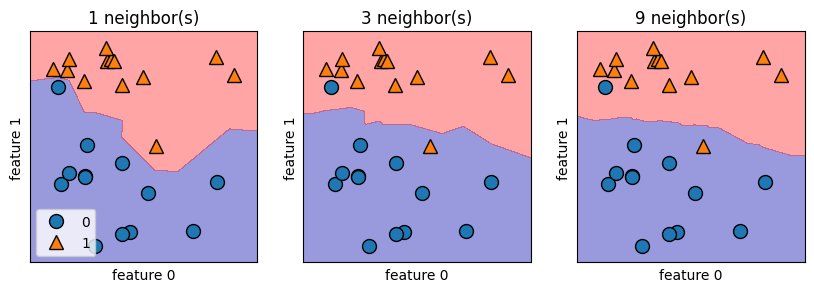

In [ ]:
'''
This code visualizes the decision boundaries created by the k-Nearest Neighbors classifier for different values of 𝑘
k (number of neighbors) using subplots.
'''
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n , ax in zip([1, 3, 9], axes):
   clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
   mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
   # fill=True > fills the regions with different colors.
   # eps=0.5 > sets the resolution of the plot.
   # ax=ax > specifies the subplot to plot on
   #alpha=.4 > sets the transparency of the filled regions.
   mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
   ax.set_title(f"{n} neighbor(s)")
   ax.set_xlabel("feature 0")
   ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show()



When using a single neighbor, the decision boundary closely follows the training data, resulting in a more complex model. As the number of neighbors increases, the decision boundary becomes smoother, leading to a simpler model. This means fewer neighbors result in higher model complexity, while more neighbors result in lower model complexity. In the extreme case, if the number of neighbors equals the total number of training points, every prediction would be the same, corresponding to the most frequent class in the training set.

-------------------------------------
Let's examine whether we can confirm the relationship between model complexity and generalization. We'll use the real-world Breast Cancer dataset for this investigation. First, we'll split the dataset into training and test sets. Then, we'll evaluate the performance on both sets using different numbers of neighbors.

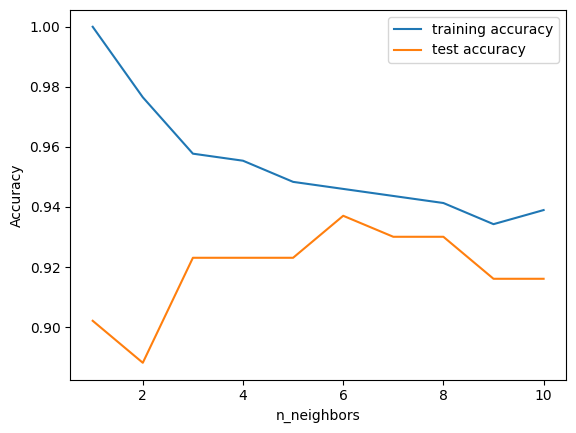

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- The plot displays the accuracy of our model on both the training and test datasets. The number of neighbors (n_neighbors) is shown on the x-axis, while accuracy is shown on the y-axis. Although real-world data plots aren't perfectly smooth, we can observe patterns of overfitting and underfitting.

- When we use fewer neighbors, the model becomes more complex, which is why the plot is flipped horizontally compared to Figure 2-1. Using just one neighbor gives perfect accuracy on the training data. However, as we increase the number of neighbors, the model simplifies, and training accuracy decreases.

- On the test data, using one neighbor results in lower accuracy compared to using more neighbors. This suggests that relying on a single neighbor makes the model too complex. Conversely, using ten neighbors makes the model too simple, leading to even worse performance. The best accuracy usually occurs with around six neighbors, striking a balance between complexity and performance.

- It's important to note that even the worst performance on this scale is around 88% accuracy, which can still be acceptable depending on the application.

-------------------------------------------------
##**k-neighbors regression**

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s
start by using the single nearest neighbor, this time using the wave dataset. We’ve
added three test data points as green stars on the x-axis. The prediction using a single
neighbor is just the target value of the nearest neighbor. These are shown as blue stars
in Figure 2-8:


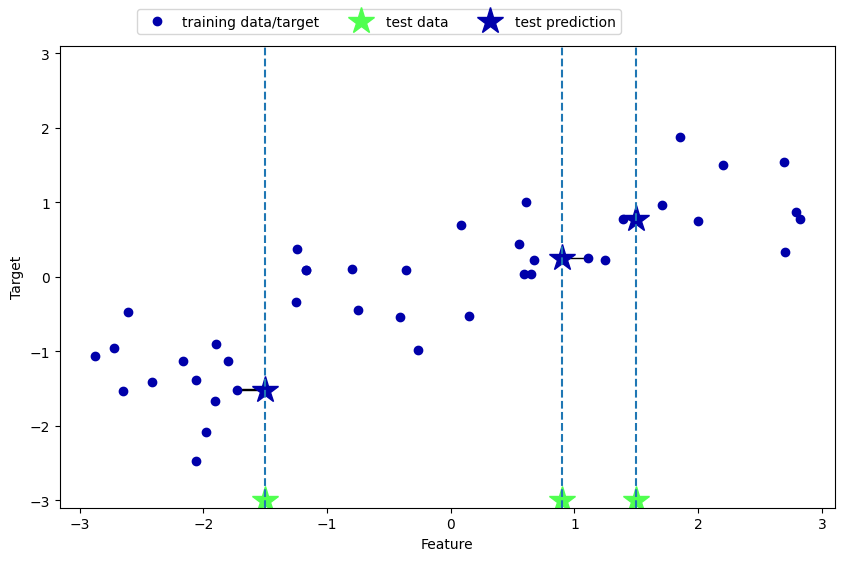

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


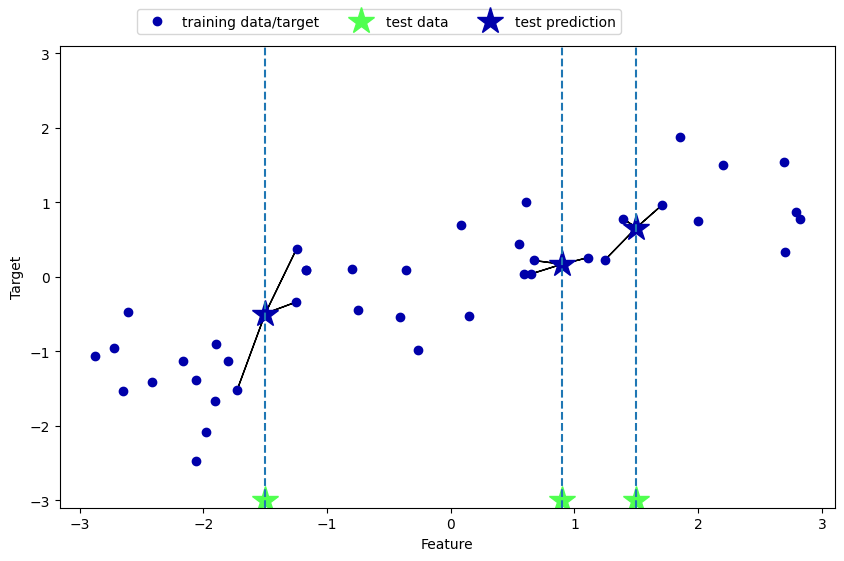

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)


##**The KNeighborsRegressor and KNeighborsClassifier**

- both algorithms provided by scikit-learn for supervised learning tasks, but they serve different purposes based on the nature of the problem they are applied to:

##**KNeighborsClassifier**
- **Purpose:** Used for classification tasks where the goal is to predict the class labels of new data points based on the labeled data points in the training set.
- **Algorithm:** The classifier finds the k-nearest neighbors of a data point in the feature space and assigns the class label that is most common among its neighbors (majority voting).
- **Output:** Predicts discrete class labels (e.g., categories like "spam" or "not spam" in email classification).

##**KNeighborsRegressor**
- **Purpose:** Used for regression tasks where the goal is to predict a continuous target variable based on the input features.
- **Algorithm:** The regressor finds the k-nearest neighbors of a data point and predicts the average (or weighted average) of their target values as the output for that data point.
Output: Predicts continuous numerical values (e.g., predicting house prices, temperature, or stock prices).
Key Differences
- **Output Type:** Classifier predicts discrete class labels, while Regressor predicts continuous numerical values.
Evaluation: Classifier typically uses metrics like accuracy, precision, recall, or F1-score, while Regressor uses metrics like mean squared error (MSE), mean absolute error (MAE), or
𝑅
2
R
2
  score.
Application: Classifier is used for tasks like spam detection, image classification, or sentiment analysis. Regressor is used for tasks like predicting house prices, stock prices, or any continuous variable prediction.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


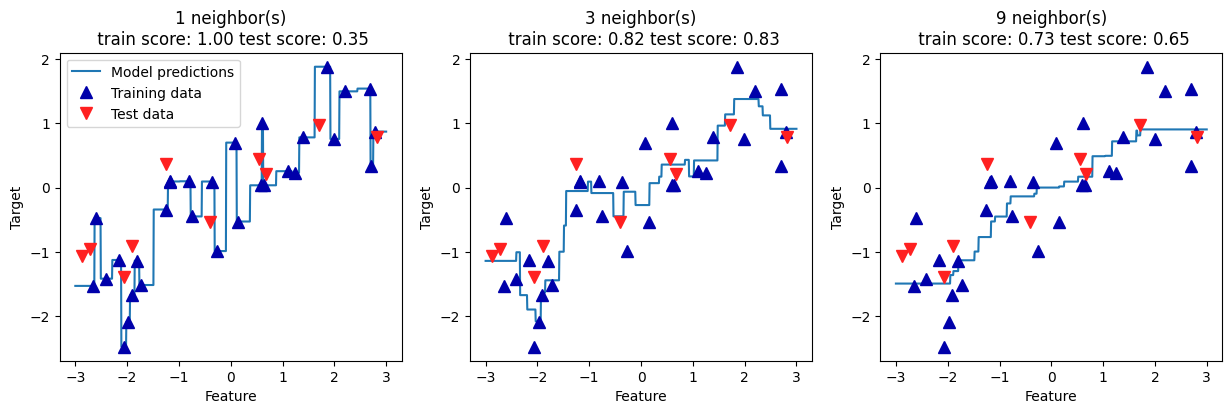

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import mglearn

# Generate dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Iterate over different values for n_neighbors
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Create and fit the KNeighborsRegressor
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)

    # Plot the model predictions
    ax.plot(line, reg.predict(line), label="Model predictions")

    # Plot the training data
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8, label="Training data")

    # Plot the test data
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8, label="Test data")

    # Set the title with train and test scores
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

# Add legend to the first subplot
axes[0].legend(loc='best')

# Show the plot
plt.show()


##**Strengths, Weaknesses, and Parameters of k-NN**

###**Parameters:**
#####**Number of Neighbors:**
 - This is a key parameter for the k-NN classifier.
 - Using a small number of neighbors like 3 or 5 often works well.
 - It's important to adjust this parameter to find the best value for your data.

#####**Distance Measure:**
 - Another important parameter is how you measure the distance between data points.
 - By default, Euclidean distance is used, which works well in many situations.
 - Choosing the right distance measure can be complex and is beyond the scope of this summary.

###**Strengths:**
#####**Easy to Understand:**
- The k-NN model is simple and intuitive.
- It often gives reasonable performance without needing many adjustments.

#####**Quick to Build**
- Constructing the nearest neighbors model is usually very fast.tments.

#####**Good Baseline**
- It's a good starting point before trying more advanced methods.

###**Weaknesses:**
#####**Slow Predictions:**
- Predictions can be slow if the training set is very large, either in terms of the number of features or samples.

#####**Requires Preprocessing**
- It’s important to preprocess your data properly for k-NN to work well.

#####**Not Suitable for High-Dimensional Data**
- The algorithm does not perform well on datasets with many features (hundreds or more).

#####**Poor Performance on Sparse Data**
- It struggles with datasets where most features are 0 most of the time.

